In [20]:
import random
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torch import nn
from PIL import Image, ImageFilter
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Let's first observe how the images are labelled

In [3]:
def get_paths(path:str):
    '''
        1.  Images Path containing all the images
        2.  GT Path containing `gt.txt` which contains ground trouth labels:
            1,1,912,484,97,109,0,7,1
            2,1,912,484,97,109,0,7,1
            3,1,912,484,97,109,0,7,1
            4,1,912,484,97,109,0,7,1
            ...
        3.  Returns the path to seqinfo.ini file
            Contains the following datapoints:
                name=MOT17-02
                imDir=img1
                frameRate=30
                seqLength=600
                imWidth=1920
                imHeight=1080
                imExt=.jpg 
    '''
    seq_info_path = f'{path}/seqinfo.ini'
    gt_path = f'{path}/gt/gt.txt'    
    return gt_path, seq_info_path

In [4]:
sample_train_path = r'mot17/MOT17Det/train/MOT17-02'
sample_train_gt_path, sample_train_seq_info_path = get_paths(sample_train_path)
print(sample_train_gt_path)
print(sample_train_seq_info_path)

mot17/MOT17Det/train/MOT17-02/gt/gt.txt
mot17/MOT17Det/train/MOT17-02/seqinfo.ini


In [5]:
# Obtain useful information from the file
def get_seq_info_from_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    seq_info = {}
    lines = lines[1:] # Skipping [Sequence] File
    for line in lines:
        if line.strip() != '':
            key, value = line.strip().split('=')
            seq_info[key] = value
        else:
            print(line.strip())
    return seq_info

def get_gt_details(gt_path):
    with open(gt_path, 'r') as f:
        lines = f.readlines()
    return list(map(lambda x: list(map(float, x.strip().split(','))), lines))

In [6]:
seq_info = get_seq_info_from_file(sample_train_seq_info_path)
print(seq_info)


{'name': 'MOT17-02', 'imDir': 'img1', 'frameRate': '30', 'seqLength': '600', 'imWidth': '1920', 'imHeight': '1080', 'imExt': '.jpg'}


In [7]:
gt_paths = get_gt_details(sample_train_gt_path)
print(gt_paths[0])

[1.0, 1.0, 912.0, 484.0, 97.0, 109.0, 0.0, 7.0, 1.0]


In [8]:
def get_image_path_based_on_seq_info(seq_info_path):
    seq_info = get_seq_info_from_file(seq_info_path)
    img_path = '/'.join(seq_info_path.split('/')[:-1]) + '/' + seq_info['imDir']
    return img_path

In [9]:
img_path = get_image_path_based_on_seq_info(sample_train_seq_info_path)
print(img_path)


mot17/MOT17Det/train/MOT17-02/img1


In [16]:
def get_all_image_files_from_path(path, extension):
    image_files = []
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(extension):
                file_path = os.path.join(root, file)
                image_files.append(file_path)
    return image_files

def consolidate_image_data(seq_info_path, gt_text_path):
    gt_list = get_gt_details(gt_text_path)
    seq_info = get_seq_info_from_file(seq_info_path)
    root_image_path = get_image_path_based_on_seq_info(seq_info_path)
    images = get_all_image_files_from_path(path = root_image_path, extension = seq_info['imExt'])
    return gt_list, seq_info, images

In [ ]:
def consolidate_image_data(seq_info_path, gt_text_path):
    gt_list = get_gt_details(gt_text_path)
    seq_info = get_seq_info_from_file(seq_info_path)
    root_image_path = get_image_path_based_on_seq_info(seq_info_path)
    images = get_all_image_files_from_path(path = root_image_path, extension = seq_info['imExt'])
    print(len(gt_list), len(images))
    # assert len(gt_list) == len(images)
    return gt_list, seq_info, images

def visualize_bounding_box(path, gt_info):
    # frame number, object id, x, y, w, h, confidence, label, visibility
    f,o,x,y,w,h,_,_,_ = gt_info
    frame = cv2.imread(path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    color = (0, 255, 0)  # Green color in BGR
    thickness = 2
    cv2.rectangle(frame, (int(x), int(y)), (int(x + w), int(y + h)), color, thickness)
    plt.imshow(frame)
    plt.show()

#### Visualize first five frames to confirm data



30003 600


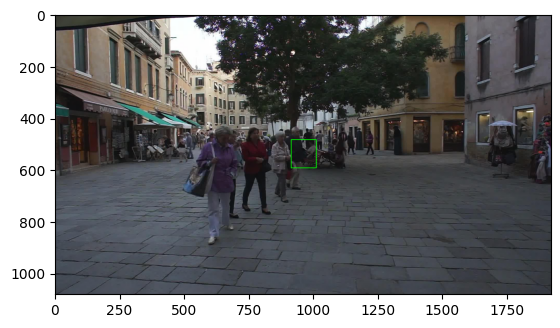

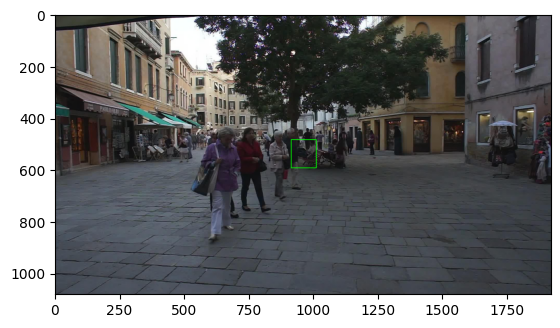

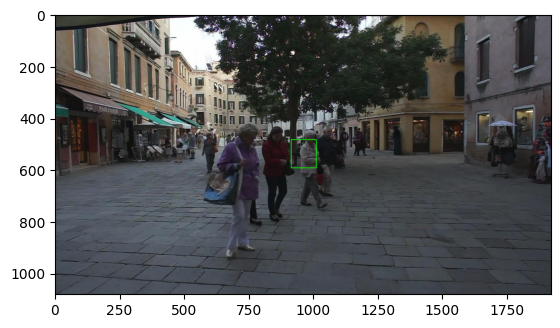

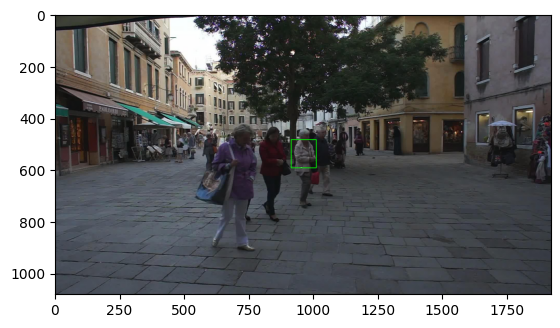

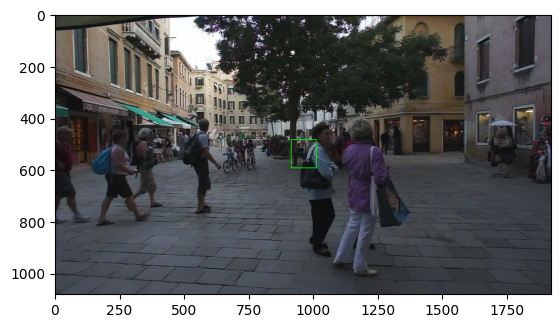

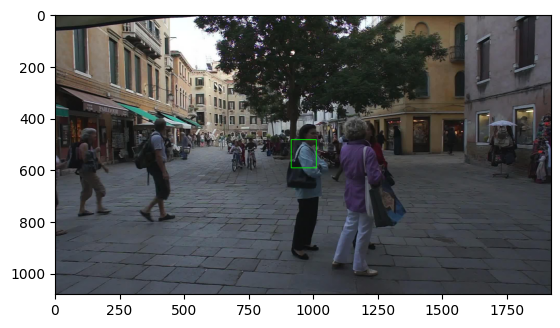

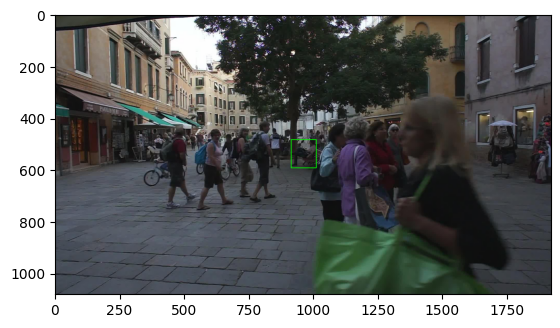

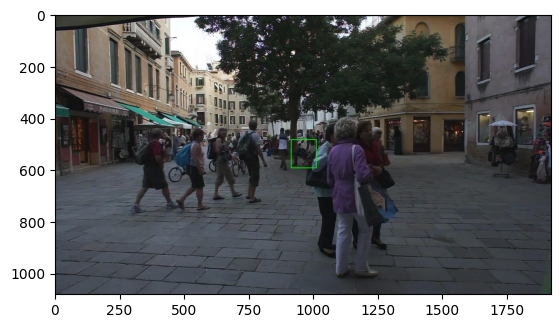

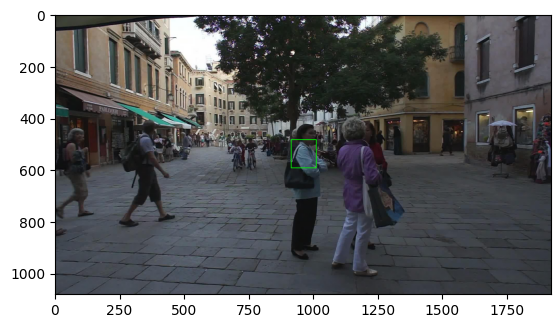

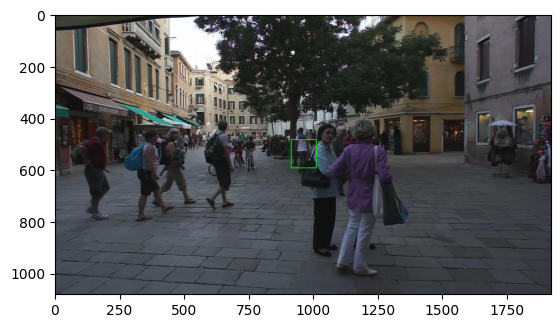

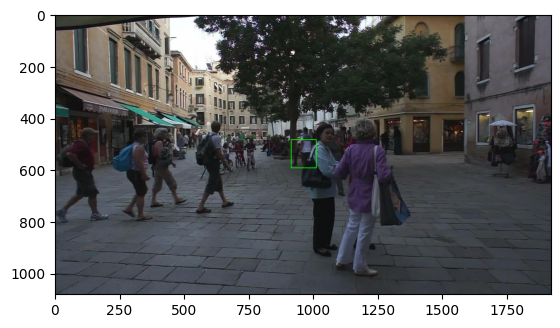

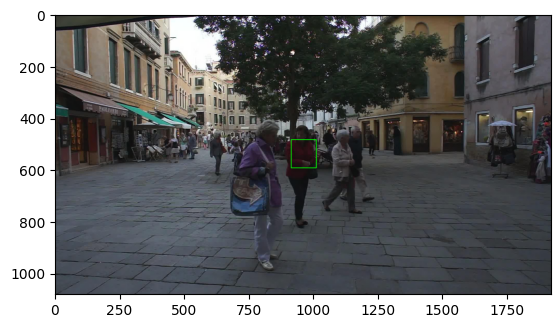

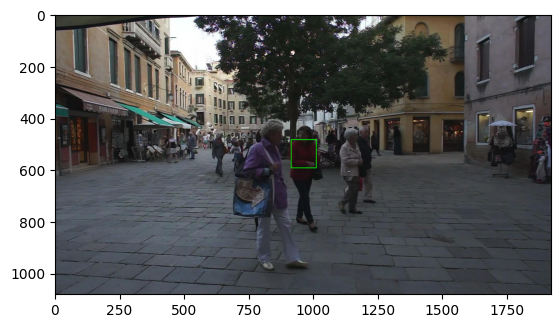

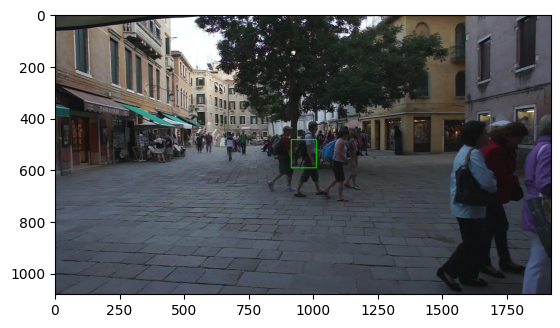

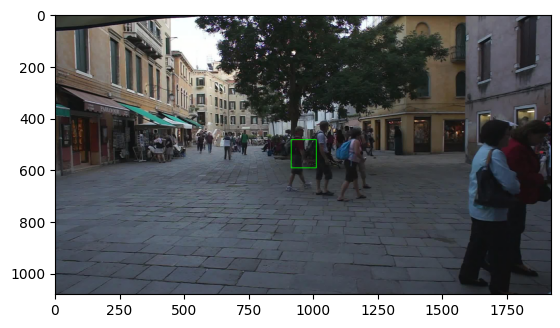

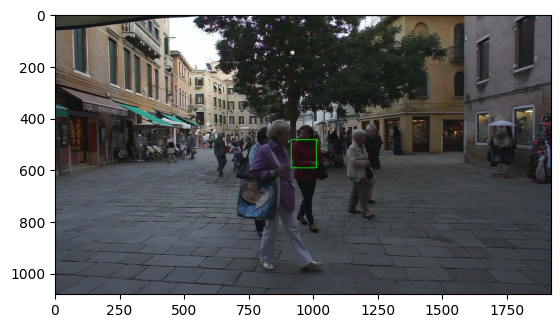

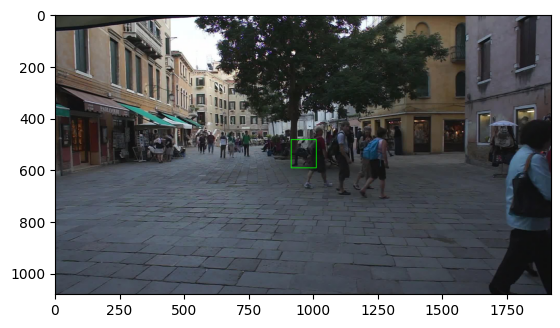

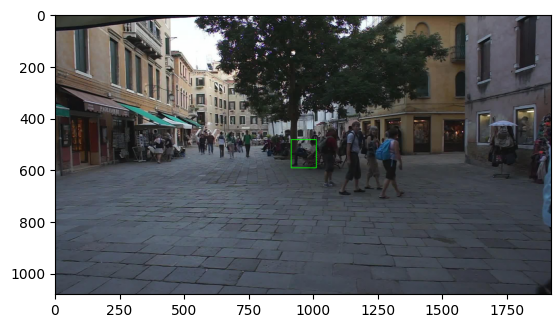

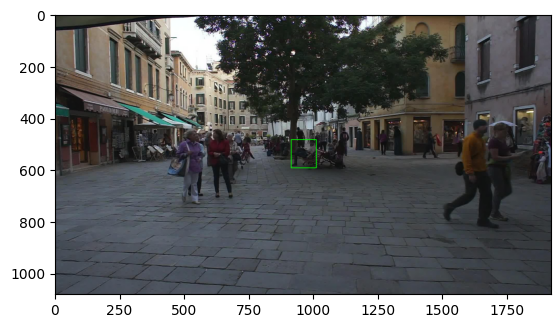

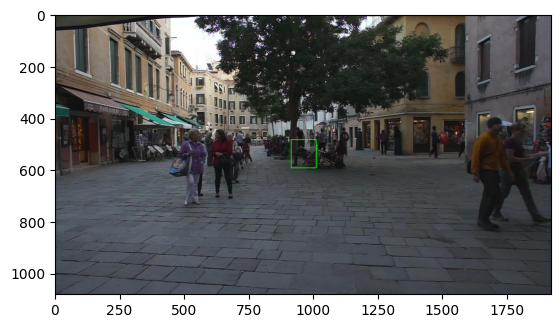

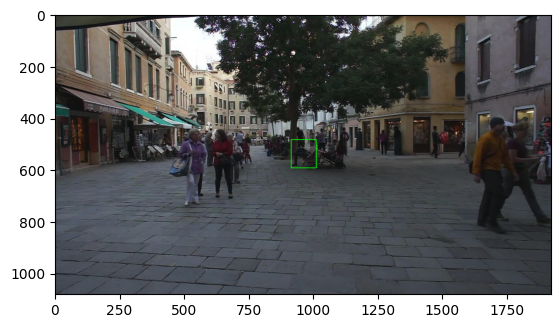

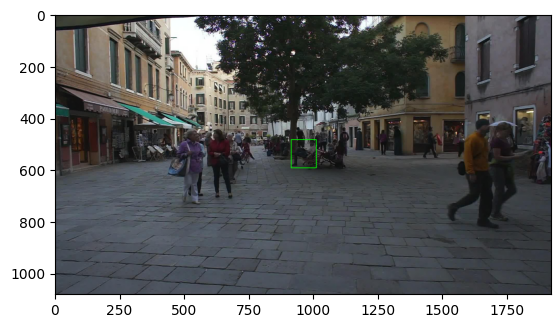

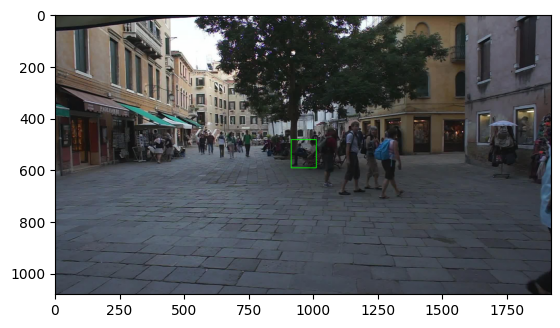

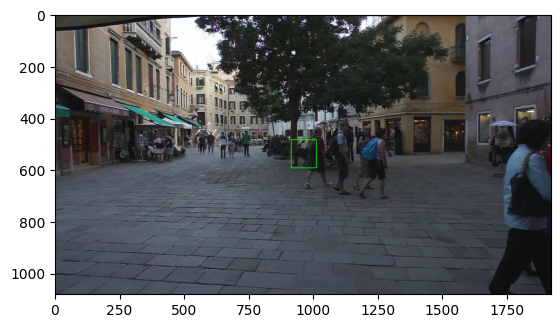

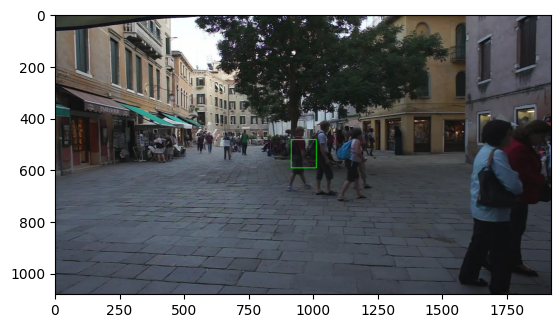

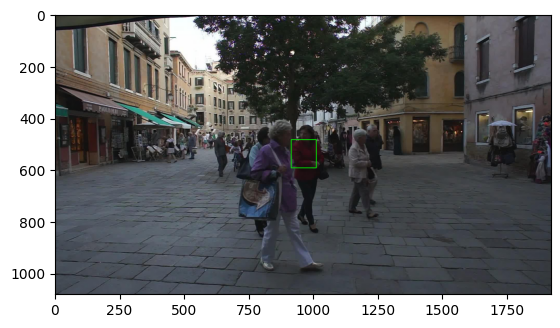

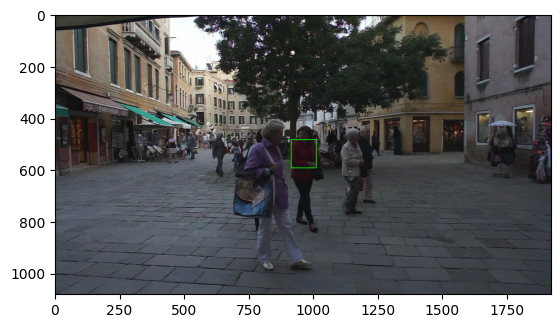

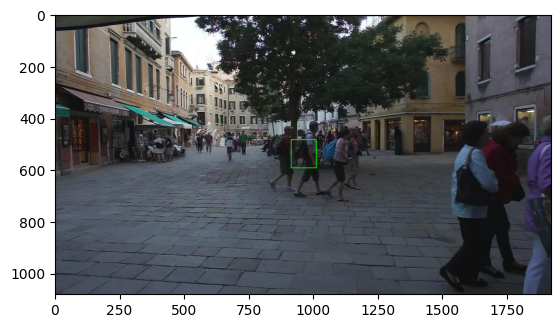

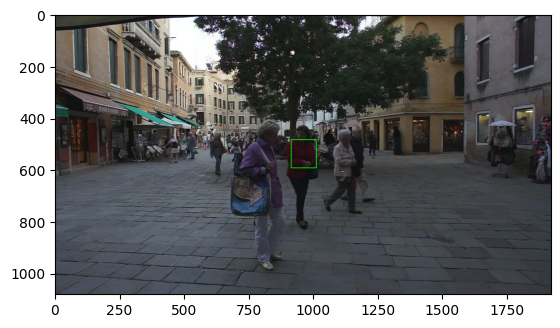

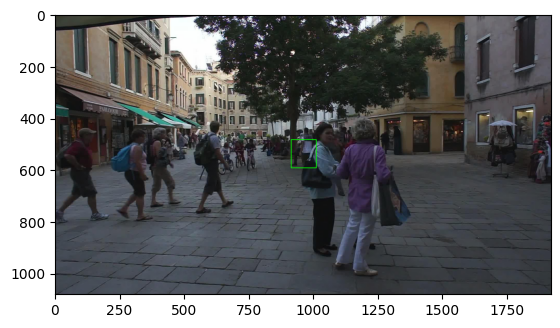

In [ ]:
gt_list, seq_info, images = consolidate_image_data(
    seq_info_path = sample_train_seq_info_path,
    gt_text_path = sample_train_gt_path
)
gt_info_for_frame1 = gt_list
imgs = images[0:30]
